Тарасов Никита 381806-3 лабораторная работа №5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Torch

In [ ]:
import torch

In [ ]:
np.random.seed(0)

X = np.random.rand(100)
y = 2*X + 5

In [ ]:

noisy_elements = np.random.randint(0,100,20  )

for i in noisy_elements:
    noise = np.random.rand() * 0.2
    is_plus = bool(np.random.randint(2))
    if is_plus:
        X[i] += noise
    else:
        X[i] -= noise

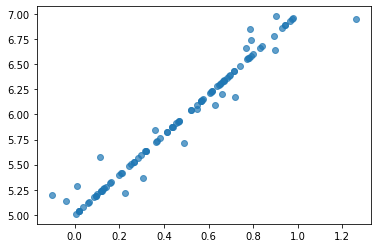

In [ ]:
plt.scatter(X, y, alpha=0.7)
pass

In [ ]:
X = X.reshape(X.shape[0], 1).astype(np.float32)
y = y.reshape(y.shape[0], 1).astype(np.float32)

In [ ]:
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1 )

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [ ]:
model = LinearRegressionModel()

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
epochs = 500
losses = []

for epoch in range(epochs):

    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

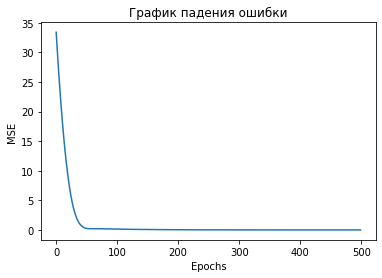

In [ ]:
plt.plot([x for x in range(epochs)], losses)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('График падения ошибки')
pass

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[1.9123]])
linear.bias tensor([5.0412])


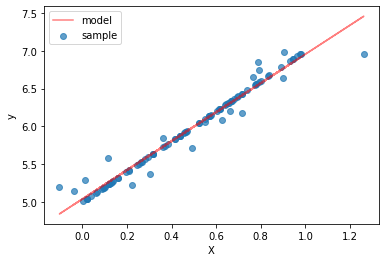

In [ ]:
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model(X_tensor).detach().numpy(), c='r', alpha=0.5)
plt.legend(['model', 'sample'])
plt.xlabel('X')
plt.ylabel('y')
pass

In [ ]:
!ipython nbconvert --to html lab5.ipynb